<h1>IMPORTING ALL THE NECESSARY LIBRARIES</h1>

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.ensemble import VotingClassifier


<h1>DATA PREPROCESSING</h1>

In [74]:
dataset = pd.read_csv("default of credit card clients.csv")
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [75]:
col_names = dataset.columns
print(col_names)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [76]:
dataset.isnull().value_counts()

ID     LIMIT_BAL  SEX    EDUCATION  MARRIAGE  AGE    PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month
False  False      False  False      False     False  False  False  False  False  False  False  False      False      False      False      False      False      False     False     False     False     False     False     False                         30000
dtype: int64

In [77]:
print(dataset.describe())

                 ID       LIMIT_BAL  ...       PAY_AMT6  default payment next month
count  30000.000000    30000.000000  ...   30000.000000                30000.000000
mean   15000.500000   167484.322667  ...    5215.502567                    0.221200
std     8660.398374   129747.661567  ...   17777.465775                    0.415062
min        1.000000    10000.000000  ...       0.000000                    0.000000
25%     7500.750000    50000.000000  ...     117.750000                    0.000000
50%    15000.500000   140000.000000  ...    1500.000000                    0.000000
75%    22500.250000   240000.000000  ...    4000.000000                    0.000000
max    30000.000000  1000000.000000  ...  528666.000000                    1.000000

[8 rows x 25 columns]


In [78]:
for i in col_names:
  print(i,dataset[i].unique())

ID [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX [2 1]
EDUCATION [2 1 3 5 4 6 0]
MARRIAGE [1 2 3 0]
AGE [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [80]:
dataset["default payment next month"].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default payment next month, dtype: float64

In [81]:
target_temp = dataset["default payment next month"].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


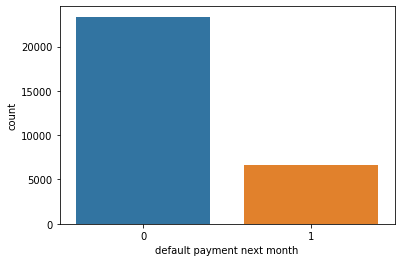

Percentage of people who are not defaulters:77.88
Percentage of people who are defaulters:22.12


In [82]:
y = dataset["default payment next month"]
sns.countplot(y)
plt.show()
# target_temp = dataset.target.value_counts()
print("Percentage of people who are not defaulters:"+str(round(target_temp[0]*100/30000,2)))
print("Percentage of people who are defaulters:"+str(round(target_temp[1]*100/30000,2)))

In [83]:
print(dataset.corr()["default payment next month"].abs().sort_values(ascending=False))

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
LIMIT_BAL                     0.153520
PAY_AMT1                      0.072929
PAY_AMT2                      0.058579
PAY_AMT4                      0.056827
PAY_AMT3                      0.056250
PAY_AMT5                      0.055124
PAY_AMT6                      0.053183
SEX                           0.039961
EDUCATION                     0.028006
MARRIAGE                      0.024339
BILL_AMT1                     0.019644
BILL_AMT2                     0.014193
BILL_AMT3                     0.014076
ID                            0.013952
AGE                           0.013890
BILL_AMT4                     0.010156
BILL_AMT5                     0.006760
BILL_AMT6                     0.005372
Name: default payment nex

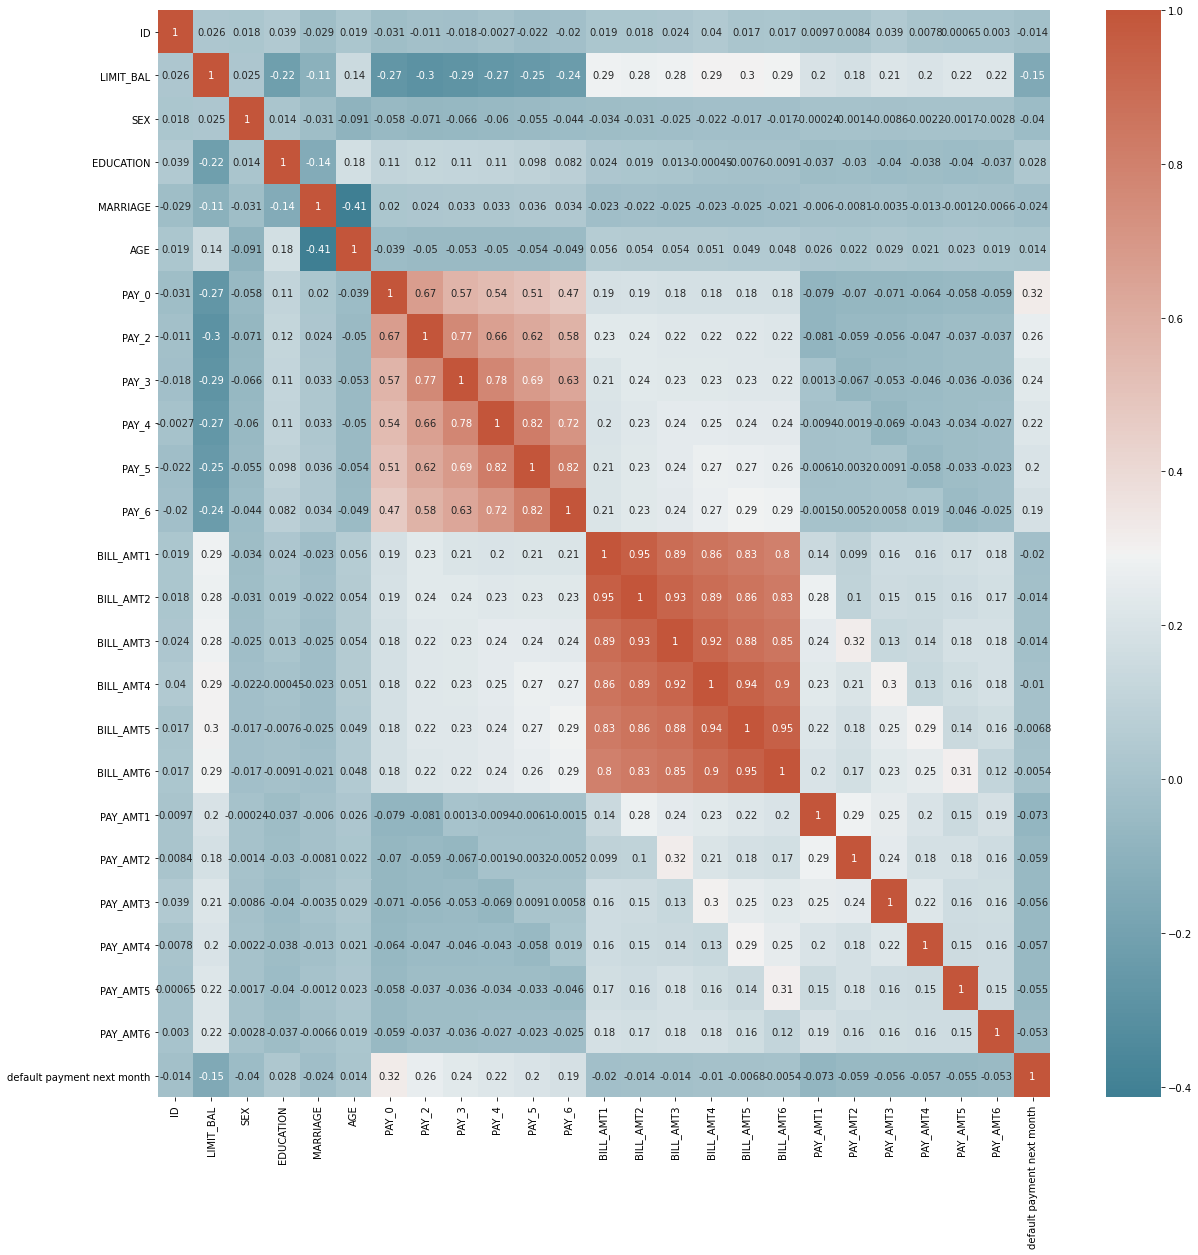

In [84]:
corr = dataset.corr()# plot the heatmap
plt.subplots(figsize=(20,20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<h2>OVERSAMPLING DATA USING SMOTE</h2>

In [85]:
predictors = dataset.drop("default payment next month",axis=1)
target = dataset[["default payment next month"]]

In [86]:
sm = SMOTE(random_state = 42)
predictors_new, target_new = sm.fit_sample(predictors, target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [87]:
df_p = pd.DataFrame(predictors_new)
df_t = pd.DataFrame(target_new)

In [88]:
balanced_dataset = pd.concat([df_p, df_t],axis=1)
balanced_dataset.columns = col_names
balanced_dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [89]:
balanced_dataset["default payment next month"].value_counts()

1    23364
0    23364
Name: default payment next month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


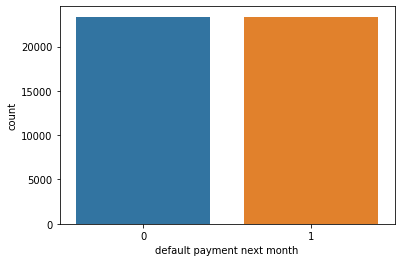

Percentage of people who are not defaulters:50.0
Percentage of people who are defaulters:50.0


In [90]:
y = balanced_dataset["default payment next month"]
sns.countplot(y)
plt.show()
target_temp = balanced_dataset["default payment next month"].value_counts()
print("Percentage of people who are not defaulters:"+str(round(target_temp[0]*100/46728,2)))
print("Percentage of people who are defaulters:"+str(round(target_temp[1]*100/46728,2)))

In [91]:
i_edu = balanced_dataset[((balanced_dataset.EDUCATION == 0) | ( balanced_dataset.EDUCATION == 5) | (balanced_dataset.EDUCATION == 6))].index
i_mar = balanced_dataset[((balanced_dataset.MARRIAGE == 0))].index
balanced_dataset.drop(i_edu,inplace=True)
balanced_dataset.drop(i_mar,inplace=True)

In [92]:
for i in col_names:
  print(i,balanced_dataset[i].unique())

ID [    1     2     3 ... 15108 27770 22601]
LIMIT_BAL [ 20000 120000  90000 ... 237722 261129  53898]
SEX [2 1]
EDUCATION [2 1 3 4]
MARRIAGE [1 2 3]
AGE [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 42 43 45 46 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 62 66 70
 72 64 65 71 69 68 79 74]
PAY_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 [-2  0 -1  2  3  5  4  7  8  6  1]
PAY_6 [-2  2  0 -1  3  6  4  7  8  5  1]
BILL_AMT1 [  3913   2682  29239 ... 183055 157197  46144]
BILL_AMT2 [  3102   1725  14027 ... 186393 167106  47108]
BILL_AMT3 [   689   2682  13559 ... 187071 166105  48027]
BILL_AMT4 [     0   3272  14331 ...  11859 181465   6585]
BILL_AMT5 [     0   3455  14948 ... 105756  10769 182288]
BILL_AMT6 [     0   3261  15549 ...  81274 181628  50584]
PAY_AMT1 [   0 1518 2000 ... 7438 3386 4930]
PAY_AMT2 [  689  1000  1500 ...  58

In [93]:
balanced_dataset.shape

(46298, 25)

In [94]:
print(balanced_dataset.corr()["default payment next month"].abs().sort_values(ascending=False))

default payment next month    1.000000
PAY_0                         0.346037
PAY_2                         0.286086
PAY_3                         0.253986
PAY_4                         0.237517
PAY_5                         0.229859
SEX                           0.213417
PAY_6                         0.212570
MARRIAGE                      0.208385
LIMIT_BAL                     0.198376
PAY_AMT1                      0.112238
PAY_AMT2                      0.090878
PAY_AMT4                      0.088744
PAY_AMT6                      0.088096
PAY_AMT3                      0.086197
PAY_AMT5                      0.083486
EDUCATION                     0.082362
BILL_AMT1                     0.023415
ID                            0.018754
BILL_AMT2                     0.015733
BILL_AMT3                     0.015081
BILL_AMT4                     0.010544
BILL_AMT5                     0.006938
BILL_AMT6                     0.003882
AGE                           0.001090
Name: default payment nex

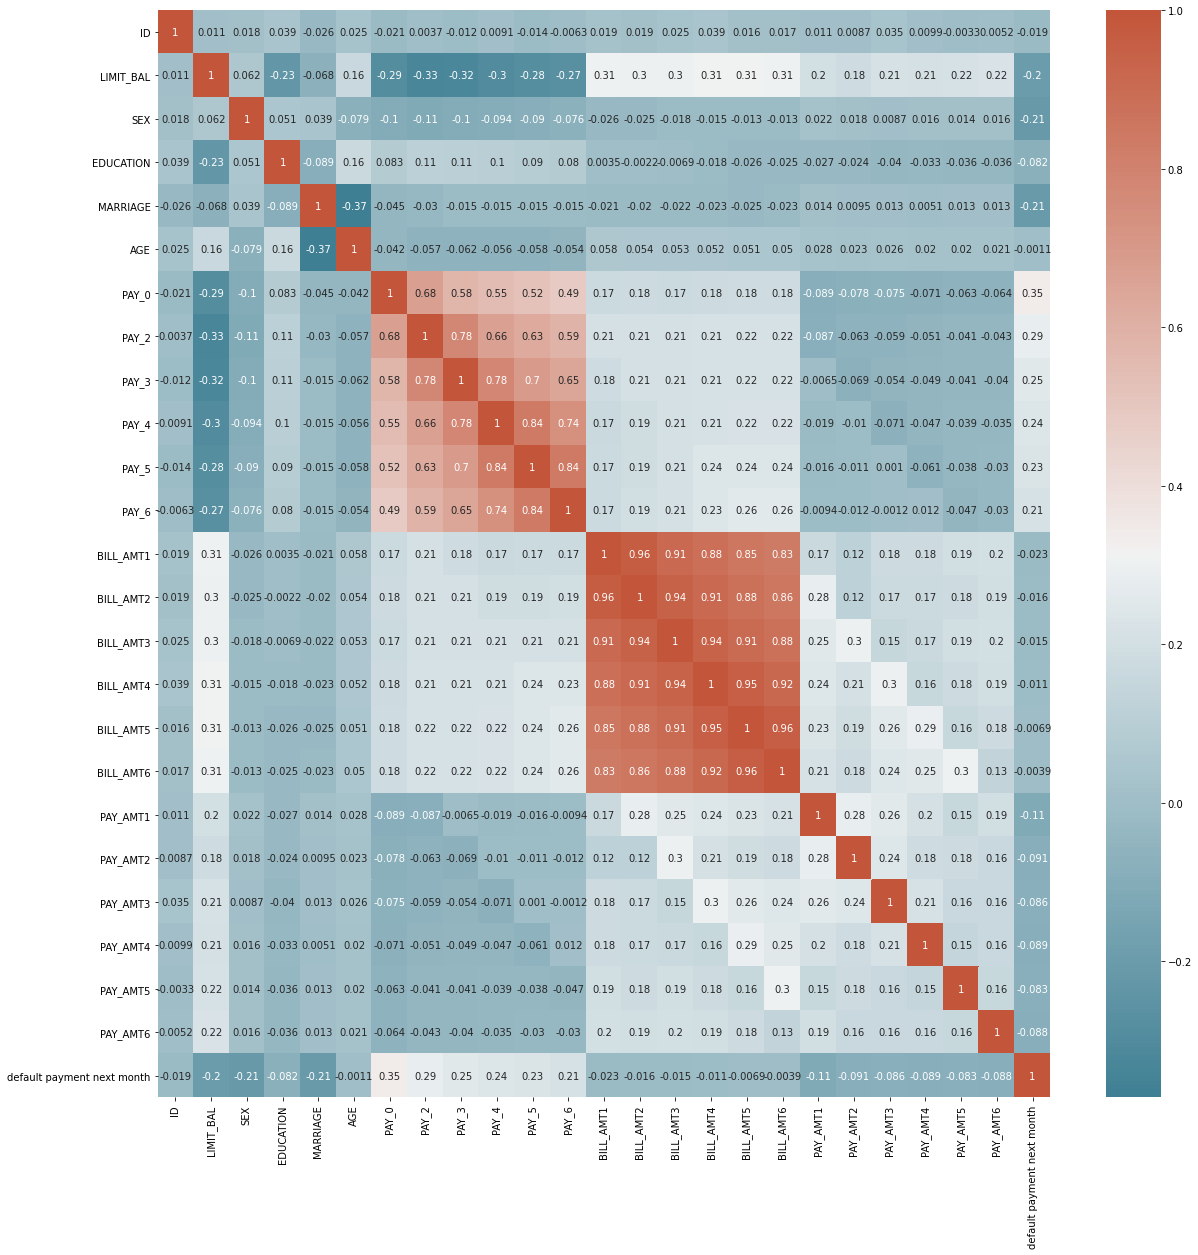

In [95]:
corr = balanced_dataset.corr()# plot the heatmap
plt.subplots(figsize=(20,20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [96]:
# y_plot = balanced_dataset["default payment next month"]
# figure, axes = plt.subplots(nrows=2, ncols=2)
# axes[0, 0].bar(balanced_dataset["LIMIT_BAL"], y_plot)
# for i in range(3):
#   for j in range(8):
#     axes[i, j].plot(balanced_dataset[col_plots], y_plot)

In [97]:
# balanceLIM = balanced_dataset["LIMIT_BAL"]
# bins = np.linspace(balanceLIM.min(), balanceLIM.max(), 10)
# digitized = np.digitize(balanceLIM, bins)
# plt.hist(balanced_dataset["default payment next month"],bins)

<h1>TRAIN TEST SPLIT</h1>

In [98]:
predictors = balanced_dataset.drop(["ID","default payment next month"],axis=1)
target = balanced_dataset["default payment next month"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print('The shape for the predictor variables used for training is:',X_train.shape,
'\nThe shape for the predictor variables used for testing is:',X_test.shape,
'\nThe shape for the target variable used for training is:',Y_train.shape,
'\nThe size for the target variable used for testing is:',Y_test.shape)

The shape for the predictor variables used for training is: (37038, 23) 
The shape for the predictor variables used for testing is: (9260, 23) 
The shape for the target variable used for training is: (37038,) 
The size for the target variable used for testing is: (9260,)


In [99]:
print(Y_train.value_counts(),'\n',Y_test.value_counts())

1    18625
0    18413
Name: default payment next month, dtype: int64 
 1    4677
0    4583
Name: default payment next month, dtype: int64


<h1>KNN MODEL</h1>

In [100]:
def KNN_Model(n):
  knn = KNeighborsClassifier(n_neighbors=n, n_jobs=-1).fit(X_train,Y_train)
  Y_pred=knn.predict(X_test)
  
  print("The accuracy of the model using {} neighbours is {}".format(n,metrics.accuracy_score(Y_test,Y_pred)*100))
  print("----------------------------------------------------------------------")
acc = {}
for i in range(2,10):
  acc[i] = KNN_Model(i)


The accuracy of the model using 2 neighbours is 78.6501079913607
----------------------------------------------------------------------
The accuracy of the model using 3 neighbours is 75.74514038876889
----------------------------------------------------------------------
The accuracy of the model using 4 neighbours is 75.0
----------------------------------------------------------------------
The accuracy of the model using 5 neighbours is 73.74730021598272
----------------------------------------------------------------------
The accuracy of the model using 6 neighbours is 72.74298056155507
----------------------------------------------------------------------
The accuracy of the model using 7 neighbours is 71.77105831533477
----------------------------------------------------------------------
The accuracy of the model using 8 neighbours is 71.88984881209504
----------------------------------------------------------------------
The accuracy of the model using 9 neighbours is 70.6587

In [101]:
# print(acc)
# KNN_Model(2)

78.6501079913607
              precision    recall  f1-score   support

     class 0       0.77      0.81      0.79      4583
     class 1       0.80      0.76      0.78      4677

    accuracy                           0.79      9260
   macro avg       0.79      0.79      0.79      9260
weighted avg       0.79      0.79      0.79      9260



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


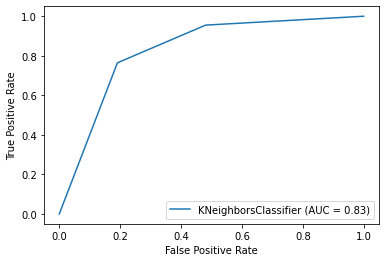

In [102]:
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1).fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
  
print(metrics.accuracy_score(Y_test,Y_pred)*100)

target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred,target_names=target_names))
  
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred,pos_label=2)
metrics.plot_roc_curve(knn, X_test, Y_test)
plt.show()

In [103]:
knn = KNeighborsClassifier(n_neighbors=2 , n_jobs=-1).fit(X_train,Y_train)

print('The score on the training dataset is:',knn.score(X_train,Y_train))
print("------------------------------------------------------------------")
print('The score on the testing dataset is:',knn.score(X_test,Y_test))
print("------------------------------------------------------------------")

The score on the training dataset is: 0.9543981856471732
------------------------------------------------------------------
The score on the testing dataset is: 0.786501079913607
------------------------------------------------------------------


<h1>NAIVE BAYES MODEL</h1>

<h2>GAUSSIAN NB</h2>

The accuracy of the model is 55.2267818574514%
----------------------------------------------------------------------
[[ 708 3875]
 [ 271 4406]]
              precision    recall  f1-score   support

     class 0       0.72      0.15      0.25      4583
     class 1       0.53      0.94      0.68      4677

    accuracy                           0.55      9260
   macro avg       0.63      0.55      0.47      9260
weighted avg       0.63      0.55      0.47      9260



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


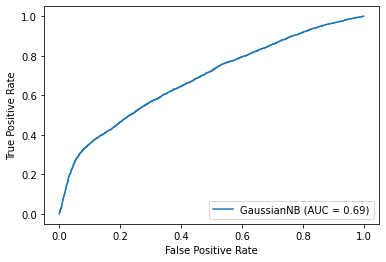

In [104]:
classifer = GaussianNB()
model = classifer.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("The accuracy of the model is {}".format(str(metrics.accuracy_score(Y_test,Y_pred)*100)+"%"))
print("----------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=2)
metrics.plot_roc_curve(model, X_test, Y_test)
plt.show()

In [105]:
print('The score on the training dataset is:',model.score(X_train,Y_train))
print("------------------------------------------------------------------")
print('The score on the testing dataset is:',model.score(X_test,Y_test))
print("------------------------------------------------------------------")

The score on the training dataset is: 0.5497867055456558
------------------------------------------------------------------
The score on the testing dataset is: 0.552267818574514
------------------------------------------------------------------


<h2>BERNOULLI NB</h2>

The accuracy of the model is 66.02591792656588%
----------------------------------------------------------------------
[[3911  672]
 [2474 2203]]
              precision    recall  f1-score   support

     class 0       0.61      0.85      0.71      4583
     class 1       0.77      0.47      0.58      4677

    accuracy                           0.66      9260
   macro avg       0.69      0.66      0.65      9260
weighted avg       0.69      0.66      0.65      9260



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


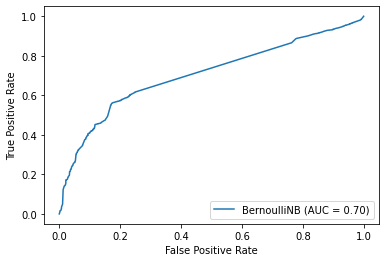

In [106]:
classifer = BernoulliNB()
model = classifer.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("The accuracy of the model is {}".format(str(metrics.accuracy_score(Y_test,Y_pred)*100)+"%"))
print("----------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=2)
metrics.plot_roc_curve(model, X_test, Y_test)
plt.show()

In [107]:
print('The score on the training dataset is:',model.score(X_train,Y_train))
print("------------------------------------------------------------------")
print('The score on the testing dataset is:',model.score(X_test,Y_test))
print("------------------------------------------------------------------")

The score on the training dataset is: 0.6642097305470058
------------------------------------------------------------------
The score on the testing dataset is: 0.6602591792656588
------------------------------------------------------------------


<h1>LOGISTIC REGRESSION MODEL</h1>

The accuracy of the model is 68.17494600431966%
----------------------------------------------------------------------
[[3293 1290]
 [1657 3020]]
              precision    recall  f1-score   support

     class 0       0.67      0.72      0.69      4583
     class 1       0.70      0.65      0.67      4677

    accuracy                           0.68      9260
   macro avg       0.68      0.68      0.68      9260
weighted avg       0.68      0.68      0.68      9260



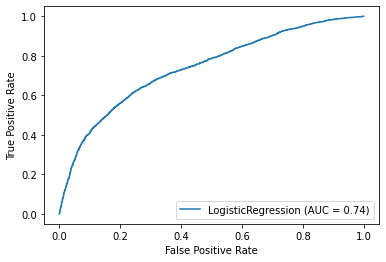

In [108]:
logistic_regression = LogisticRegression(solver="liblinear", random_state=0)
# Train model
model = logistic_regression.fit(X_train, Y_train)
#Predictions
Y_pred = model.predict(X_test)
print("The accuracy of the model is {}".format(str(metrics.accuracy_score(Y_test,Y_pred)*100)+"%"))
print("----------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=1)
metrics.plot_roc_curve(model, X_test, Y_test)
plt.show()

In [109]:
print('The score on the training dataset is:',model.score(X_train,Y_train))
print("------------------------------------------------------------------")
print('The score on the testing dataset is:',model.score(X_test,Y_test))
print("------------------------------------------------------------------")

The score on the training dataset is: 0.6774933851719855
------------------------------------------------------------------
The score on the testing dataset is: 0.6817494600431966
------------------------------------------------------------------


<h1>DECISION TREE MODEL</h1>

In [110]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

The accuracy of the model is 75.33477321814254%
----------------------------------------------------------------------
[[3371 1212]
 [1072 3605]]
              precision    recall  f1-score   support

     class 0       0.76      0.74      0.75      4583
     class 1       0.75      0.77      0.76      4677

    accuracy                           0.75      9260
   macro avg       0.75      0.75      0.75      9260
weighted avg       0.75      0.75      0.75      9260



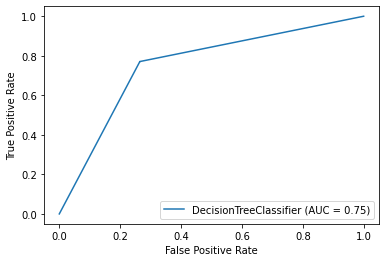

In [111]:
yhat = tree.predict(X_test)
print("The accuracy of the model is {}".format(str(metrics.accuracy_score(Y_test,yhat)*100)+"%"))
print("----------------------------------------------------------------------")
print(confusion_matrix(Y_test, yhat))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, yhat, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, yhat, pos_label=1)
metrics.plot_roc_curve(tree, X_test, Y_test)
plt.show()

In [112]:
print('The score on the training dataset is:',tree.score(X_train,Y_train))
print("------------------------------------------------------------------")
print('The score on the testing dataset is:',tree.score(X_test,Y_test))
print("------------------------------------------------------------------")

The score on the training dataset is: 0.9992710189535072
------------------------------------------------------------------
The score on the testing dataset is: 0.7533477321814255
------------------------------------------------------------------


<h1>BAGGING</h1>

The accuracy of the model is 81.1987041036717%
----------------------------------------------------------------------
[[3926  657]
 [1084 3593]]
              precision    recall  f1-score   support

     class 0       0.78      0.86      0.82      4583
     class 1       0.85      0.77      0.80      4677

    accuracy                           0.81      9260
   macro avg       0.81      0.81      0.81      9260
weighted avg       0.81      0.81      0.81      9260



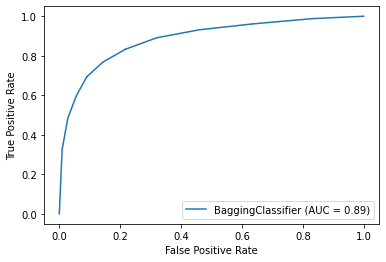

In [115]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, Y_train)

yhat = model.predict(X_test)
print("The accuracy of the model is {}".format(str(metrics.accuracy_score(Y_test,yhat)*100)+"%"))
print("----------------------------------------------------------------------")
print(confusion_matrix(Y_test, yhat))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, yhat, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, yhat, pos_label=1)
metrics.plot_roc_curve(model, X_test, Y_test)
plt.show()

In [116]:
print('The score on the training dataset is:',model.score(X_train,Y_train))
print("------------------------------------------------------------------")
print('The score on the testing dataset is:',model.score(X_test,Y_test))
print("------------------------------------------------------------------")

The score on the training dataset is: 0.9883903018521518
------------------------------------------------------------------
The score on the testing dataset is: 0.811987041036717
------------------------------------------------------------------


<h1>XGBOOSTING MODEL</h1>

The accuracy is 81.18790496760259%
[[3854  729]
 [1013 3664]]
              precision    recall  f1-score   support

     class 0       0.79      0.84      0.82      4583
     class 1       0.83      0.78      0.81      4677

    accuracy                           0.81      9260
   macro avg       0.81      0.81      0.81      9260
weighted avg       0.81      0.81      0.81      9260



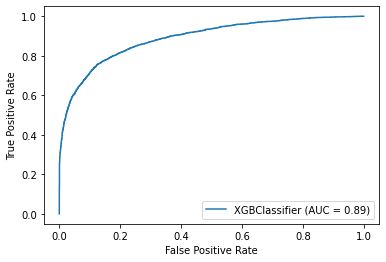

In [117]:
model=xgb.XGBClassifier(random_state=1,learning_rate=0.6)
model.fit(X_train, Y_train)
# model.score(x_test,y_test)
yhat = model.predict(X_test)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,yhat)*100)+"%")
print(confusion_matrix(Y_test, yhat))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, yhat, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, yhat, pos_label=1)
metrics.plot_roc_curve(model, X_test, Y_test)
plt.show()

In [118]:
print('The score on the training dataset is:',model.score(X_train,Y_train))
print("------------------------------------------------------------------")
print('The score on the testing dataset is:',model.score(X_test,Y_test))
print("------------------------------------------------------------------")

The score on the training dataset is: 0.832010367730439
------------------------------------------------------------------
The score on the testing dataset is: 0.8118790496760259
------------------------------------------------------------------


<h1>BAGGING WITH MAX VOTING</h1>

In [ ]:
subset1_train_X = X_train[["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE"]]
subset1_test_X = X_test[["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE"]]

In [ ]:
subset2_train_X = X_train[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]
subset2_test_X = X_test[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]

In [ ]:
subset3_train_X = X_train[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]
subset3_test_X = X_test[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]

In [ ]:
subset4_train_X = X_train[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]
subset4_test_X = X_test[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]

In [ ]:
def my_model(X_train,Y_train,X_test,Y_test):
  subset1_train_X = X_train[["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE"]]
  subset1_test_X = X_test[["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE"]]
  subset2_train_X = X_train[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]
  subset2_test_X = X_test[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]
  subset3_train_X = X_train[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]
  subset3_test_X = X_test[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]
  
  model1 = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
  model2 = tree.DecisionTreeClassifier(random_state=0,min_samples_split=2)
  model3= KNeighborsClassifier(n_neighbors=5)

  model1.fit(subset1_train_X,Y_train)
  model2.fit(subset2_train_X,Y_train)
  model3.fit(subset3_train_X,Y_train)

  pred1=model1.predict(subset1_test_X)
  pred2=model2.predict(subset2_test_X)
  pred3=model3.predict(subset3_test_X)

  # print("The accuracy of the model1 on subset1 is {}".format(str(metrics.accuracy_score(Y_test,pred1)*100)+"%"))
  # print("----------------------------------------------------------------------")
  # print("The accuracy of the model2 on subset2 is {}".format(str(metrics.accuracy_score(Y_test,pred2)*100)+"%"))
  # print("----------------------------------------------------------------------")
  # print("The accuracy of the model3 on subset3 is {}".format(str(metrics.accuracy_score(Y_test,pred3)*100)+"%"))
  # print("----------------------------------------------------------------------")

  final_pred = np.array([])
  for i in range(0,len(X_test)):
    final_pred = np.append(final_pred,ans_generator([pred1[i], pred2[i], pred3[i]]))
  return final_pred

In [ ]:
yhat = my_model(X_train,Y_train,X_test,Y_test)

In [ ]:
yhat

In [ ]:
def ans_generator(lst):
  one = 0
  zero = 0
  for i in lst:
    if i == 1:
      one += 1
    else:
      zero += 1
  if one>=zero:
    return 1
  else:
    return 0

# print(ans_generator([0, 0, 0, 1]))

In [ ]:
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred,ans_generator([pred1[i], pred2[i], pred3[i]]))

In [ ]:
print("The accuracy of the model is {}".format(str(metrics.accuracy_score(Y_test,yhat)*100)+"%"))
print("----------------------------------------------------------------------")
print(confusion_matrix(Y_test, final_pred))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, final_pred, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, final_pred, pos_label=1)
# metrics.plot_roc_curve(my_model, X_test, Y_test)
# plt.show()

In [ ]:
score_train = my_model(X_train,Y_train,X_train,Y_train)
sctr = metrics.accuracy_score(Y_train,score_train)
print(sctr)

In [ ]:
score_test = my_model(X_train,Y_train,X_test,Y_test)
scte = metrics.accuracy_score(Y_test,score_test)
print(scte)

In [ ]:
print('The score on the training dataset is:',sctr)
print("------------------------------------------------------------------")
print('The score on the testing dataset is:',scte)
print("------------------------------------------------------------------")

<h1>CROSS VALIDATION</h1>

In [124]:
balanced_data_cross = balanced_dataset.sample(n=5000)
predictors_cross = balanced_data_cross.drop(["ID","default payment next month"],axis=1)
target_cross = balanced_data_cross["default payment next month"]
print(predictors_cross.shape,target_cross.shape)

(5000, 23) (5000,)


In [125]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut

In [126]:
cv = LeaveOneOut()
# create model
model = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
# evaluate model
scores = cross_val_score(model, predictors_cross, target_cross, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print("KNN ALGORITHM")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

KNN ALGORITHM
Accuracy: 0.613 (0.487)


In [127]:
# create model
model = GaussianNB()
# evaluate model
scores = cross_val_score(model, predictors_cross, target_cross, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print("GaussianNB ALGORITHM")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

GaussianNB ALGORITHM
Accuracy: 0.549 (0.498)


In [128]:
# create model
model = BernoulliNB()
# evaluate model
scores = cross_val_score(model, predictors_cross, target_cross, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print("BernoulliNB ALGORITHM")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

BernoulliNB ALGORITHM
Accuracy: 0.690 (0.463)


In [129]:
# create model
model =  LogisticRegression(solver="liblinear", random_state=0)
# evaluate model
scores = cross_val_score(model, predictors_cross, target_cross, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print("Logistic Regression ALGORITHM")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Logistic Regression ALGORITHM
Accuracy: 0.633 (0.482)


In [130]:
# create model
model = DecisionTreeClassifier(random_state=0)
# evaluate model
scores = cross_val_score(model, predictors_cross, target_cross, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print("Decision tree ALGORITHM")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Decision tree ALGORITHM
Accuracy: 0.694 (0.461)


In [131]:
# create model
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
# evaluate model
scores = cross_val_score(model, predictors_cross, target_cross, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print("Bagging ALGORITHM")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Bagging ALGORITHM
Accuracy: 0.747 (0.435)


In [132]:
# create model
model =xgb.XGBClassifier(random_state=1,learning_rate=0.6)
# evaluate model
scores = cross_val_score(model, predictors_cross, target_cross, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print("XGBoosting ALGORITHM")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

XGBoosting ALGORITHM
Accuracy: 0.775 (0.418)


In [133]:
dataset = pd.read_csv("default of credit card clients.csv")
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [134]:
pred = dataset.drop(["ID","default payment next month"],axis=1)
tar = dataset["default payment next month"]

In [135]:
X_train,X_test,Y_train,Y_test = train_test_split(pred,tar,test_size=0.20,random_state=0)

BAGGING ALGORITHM WITH NONPREPROCESSED DATA
----------------------------------------------------------------------
The accuracy of the model is 80.46666666666667%
----------------------------------------------------------------------
[[4399  304]
 [ 868  429]]
              precision    recall  f1-score   support

     class 0       0.84      0.94      0.88      4703
     class 1       0.59      0.33      0.42      1297

    accuracy                           0.80      6000
   macro avg       0.71      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000



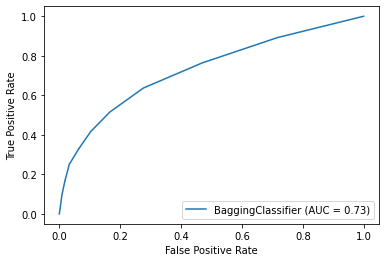

In [138]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, Y_train)

yhat = model.predict(X_test)
print("BAGGING ALGORITHM WITH NONPREPROCESSED DATA")
print("----------------------------------------------------------------------")
print("The accuracy of the model is {}".format(str(metrics.accuracy_score(Y_test,yhat)*100)+"%"))
print("----------------------------------------------------------------------")
print(confusion_matrix(Y_test, yhat))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, yhat, target_names=target_names))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, yhat, pos_label=1)
metrics.plot_roc_curve(model, X_test, Y_test)
plt.show()

BAGGING ALGORITHM WITH NONPREPROCESSED DATA
----------------------------------------------------------------------
The accuracy of the model is 76.56666666666668%
----------------------------------------------------------------------
              precision    recall  f1-score   support

     class 0       0.80      0.94      0.86      4703
     class 1       0.37      0.12      0.18      1297

    accuracy                           0.77      6000
   macro avg       0.58      0.53      0.52      6000
weighted avg       0.70      0.77      0.72      6000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


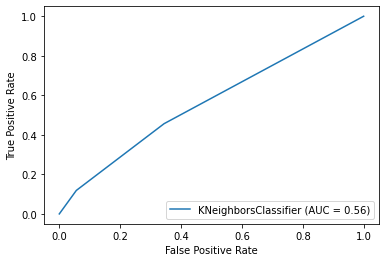

In [142]:
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1).fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
  


target_names = ['class 0', 'class 1']
print("BAGGING ALGORITHM WITH NONPREPROCESSED DATA")
print("----------------------------------------------------------------------")
print("The accuracy of the model is {}".format(str(metrics.accuracy_score(Y_test,Y_pred)*100)+"%"))
print("----------------------------------------------------------------------")
print(classification_report(Y_test, Y_pred,target_names=target_names))
  
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred,pos_label=2)
metrics.plot_roc_curve(knn, X_test, Y_test)
plt.show()